Brief : https://github.com/JTreguer/ia-bdx-ts-project2/blob/master/README.md  
Dataset on : https://data.world/environmentdata/climate-change-earth-surface  
more on : http://berkeleyearth.lbl.gov/regions/global-land

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Load and plot the dataset

In [2]:
df_init = pd.read_csv("GlobalLandTemperatures_GlobalTemperatures.csv")
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [3]:
df_init['dt'] = pd.to_datetime(df_init['dt'])
df_init.sort_values('dt', inplace=True)
df_init.set_index('dt', inplace=True)

print(df_init.shape)

df_init.head()

(3192, 8)


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_init_v1= df_init["LandAverageTemperature"].copy()
df_init_v1 = pd.DataFrame(df_init_v1)
df_init_v1

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


In [5]:
df_init_v1b = df_init_v1.loc["1753-01-01":"2015-12-01"].copy()
df_init_v1b 

,LandAverageTemperature
dt,
1753-01-01,2.039
1753-02-01,0.715
1753-03-01,5.424
1753-04-01,8.272
1753-05-01,12.186
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


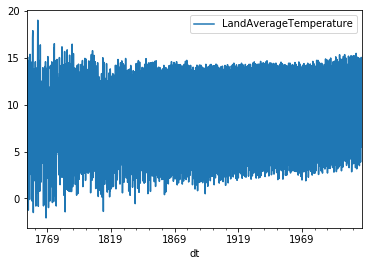

In [6]:
df_init_v1b.plot.line()

# Analyse

- Monthly time series
- 3192 data initially, but presented 12 NaN
- dropping NaN data, we have 3156 from January 1753 to December 2015 
- Time series are with no trend
- Time series seem presenting lots of seasonality

# Prediction with ARMA/ARIMA

In [7]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

## Test for stationarity

https://machinelearningmastery.com/time-series-data-stationary-python/

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.  

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

p-value

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


ADF Statistic

The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value of -3.449 at 1%.

This suggests that we can reject the null hypothesis with a significance level of less than 1% (ADF is less than -3.449) (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

### Gross data analysis

In [8]:
temp=df_init_v1b.copy()
temp

,LandAverageTemperature
dt,
1753-01-01,2.039
1753-02-01,0.715
1753-03-01,5.424
1753-04-01,8.272
1753-05-01,12.186
...,...
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801


In [9]:
rolmean0 = temp.rolling(20).mean()
rolstd0 = temp.rolling(20).std()

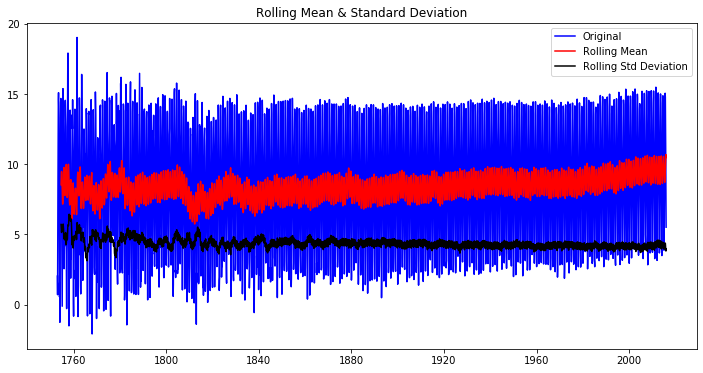

In [10]:
plt.figure(figsize=(12, 6))
orig0 = plt.plot(temp, color='blue', label='Original')
mean0 = plt.plot(rolmean0, color='red', label='Rolling Mean')
std0 = plt.plot(rolstd0, color='black', label = 'Rolling Std Deviation')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show(block=False)

<Figure size 1080x432 with 0 Axes>

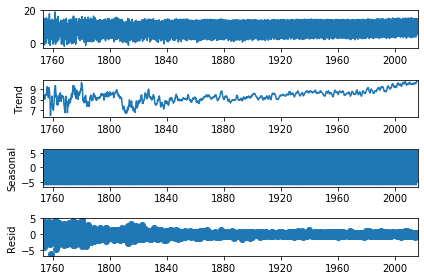

In [26]:
plt.figure(figsize=(15, 6))
result0 = seasonal_decompose(temp, model='additive')
result0.plot()
plt.show()

In [12]:
# Perform Dickey-Fuller test
res_DF0 = adfuller(temp)
print('ADF Statistic: %f' % res_DF0[0])
print('p-value: %f' % res_DF0[1])
print('Critical Values:')
for key, value in res_DF0[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.675041
p-value: 0.004478
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


### Taking the monthy difference 

In [13]:
df_init_v1b['diff'] = df_init_v1b['LandAverageTemperature'].diff()
df_init_v1b.head(5)

,LandAverageTemperature,diff
dt,,
1753-01-01,2.039,NaN
1753-02-01,0.715,-1.324
1753-03-01,5.424,4.709
1753-04-01,8.272,2.848
1753-05-01,12.186,3.914


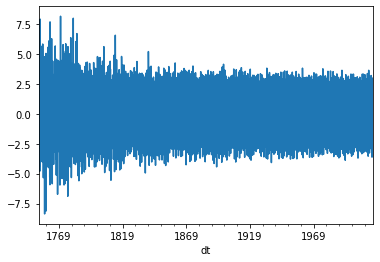

In [14]:
df_init_v1b['diff'].plot.line()

## Test for stationarity

In [16]:
tempDiff=df_init_v1b['diff'].loc["1753-02-01":"2015-12-01"]
tempDiff.shape

(3155,)

In [17]:
rolmean = tempDiff.rolling(20).mean()
rolstd = tempDiff.rolling(20).std()

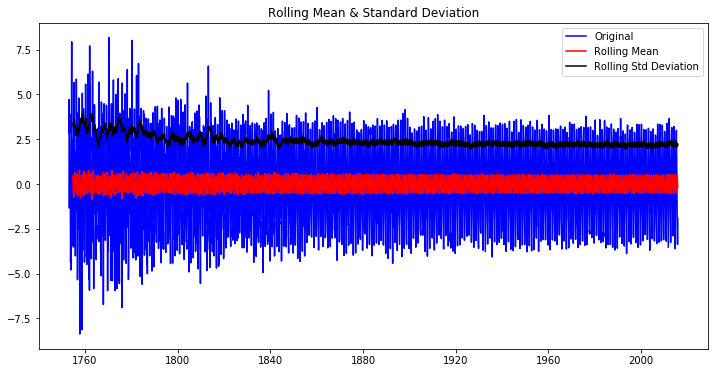

In [18]:
plt.figure(figsize=(12, 6))
orig = plt.plot(tempDiff, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std Deviation')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show(block=False)

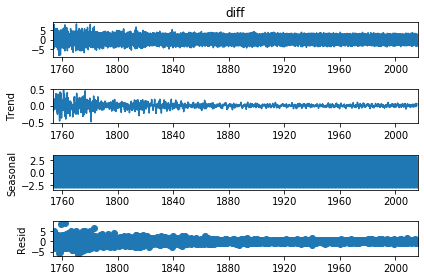

In [19]:
result = seasonal_decompose(tempDiff, model='additive')
result.plot()
plt.show()

In [20]:
# Perform Dickey-Fuller test
res_DF = adfuller(tempDiff)
print('ADF Statistic: %f' % res_DF[0])
print('p-value: %f' % res_DF[1])
print('Critical Values:')
for key, value in res_DF[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.010767
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
